#### Задача 1
Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [192]:
import numpy as np

X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [193]:
# Преобразование матрицы в набор возможных массивов
x_arrays = [X[:, i] for i in range(0, X.shape[1])]
x_arrays

[array([ 1.22401313, -0.18757272, -0.81094525,  0.75129018,  0.00972362,
        -0.62972637,  2.29536229,  0.0920418 ,  2.39252799,  0.54983815]),
 array([2.30868478, 1.30337355, 1.82463398, 2.67392052, 1.97367255,
        0.77750764, 1.81206697, 2.26971361, 3.17563985, 2.87988651]),
 array([3.03636353, 5.12093014, 5.79686488, 3.65529809, 2.50594319,
        2.84124027, 1.95026215, 7.47708735, 3.61420599, 1.65752765]),
 array([2.69287214, 3.46363202, 1.86159445, 1.66746094, 1.69755173,
        4.54410559, 1.51874636, 2.61081203, 5.10773362, 1.59635987])]

In [194]:
# Расчет возможных комбинаций
from itertools import combinations

combs = combinations(x_arrays, 2)
for c in combs:
    print(c)

(array([ 1.22401313, -0.18757272, -0.81094525,  0.75129018,  0.00972362,
       -0.62972637,  2.29536229,  0.0920418 ,  2.39252799,  0.54983815]), array([2.30868478, 1.30337355, 1.82463398, 2.67392052, 1.97367255,
       0.77750764, 1.81206697, 2.26971361, 3.17563985, 2.87988651]))
(array([ 1.22401313, -0.18757272, -0.81094525,  0.75129018,  0.00972362,
       -0.62972637,  2.29536229,  0.0920418 ,  2.39252799,  0.54983815]), array([3.03636353, 5.12093014, 5.79686488, 3.65529809, 2.50594319,
       2.84124027, 1.95026215, 7.47708735, 3.61420599, 1.65752765]))
(array([ 1.22401313, -0.18757272, -0.81094525,  0.75129018,  0.00972362,
       -0.62972637,  2.29536229,  0.0920418 ,  2.39252799,  0.54983815]), array([2.69287214, 3.46363202, 1.86159445, 1.66746094, 1.69755173,
       4.54410559, 1.51874636, 2.61081203, 5.10773362, 1.59635987]))
(array([2.30868478, 1.30337355, 1.82463398, 2.67392052, 1.97367255,
       0.77750764, 1.81206697, 2.26971361, 3.17563985, 2.87988651]), array([3.03636

In [195]:
def dets(x1, x2):
    """Определитель для матрицы (1, x1, x2)"""
    m_x = np.array([np.ones((len(x1))), x1, x2]).T
    XTX = m_x.T.dot(m_x)
    return (np.linalg.det(XTX), XTX, m_x)

In [196]:
for c in combinations(x_arrays, 2):
    print(dets(c[0], c[1])[0])

349.7782033818856
2835.3600226240915
1689.2124743606066
1427.812577608152
701.7327364453164
4547.328074863321


Определители не близки к нулю => можно продолжать.

In [197]:
def coefs(xtx, m_x, y):
    """Коэффициенты модели"""
    XTX_inv = np.linalg.inv(xtx)
    return XTX_inv.dot(m_x.T).dot(y)

In [198]:
# Определяем коэффициенты моделей
for c in combinations(x_arrays, 2):
    d, xtx, m_x = dets(c[0], c[1])
    print(coefs(xtx, m_x, y))

[6.70781579 0.40786841 1.03360247]
[3.62455695 1.62531203 1.21134979]
[5.70686123 0.68359949 1.12650707]
[2.48896193 1.60611956 0.86269915]
[1.91685221 1.74373667 1.31971882]
[3.64001086 0.70753914 1.04851745]


In [199]:
# Проверка
from sklearn.linear_model import LinearRegression

for c in combinations(x_arrays, 2):
    d, xtx, m_x = dets(c[0], c[1])
    model = LinearRegression().fit(m_x[:, 1:], y)
    print(model.intercept_, model.coef_)

6.70781579049774 [0.40786841 1.03360247]
3.6245569493851146 [1.62531203 1.21134979]
5.7068612323509935 [0.68359949 1.12650707]
2.4889619285684326 [1.60611956 0.86269915]
1.9168522076804972 [1.74373667 1.31971882]
3.640010859914187 [0.70753914 1.04851745]


Результаты совпадают.

In [200]:
# Опредеяем максимальный r2

def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

r2_max = (0, [], [])

for c in combinations(x_arrays, 2):
    d, xtx, m_x = dets(c[0], c[1])
    b = coefs(xtx, m_x, y)
    z = m_x.dot(b)
    r2 = 1 - ((y - z)**2).sum() / sum_of_squares(y)
    print(r2)
    if r2 > r2_max[0]:
        r2_max = (r2, c[0], c[1])
        
r2_max

0.18113594742585215
0.7634246238793152
0.45329667831440756
0.5479482734039012
0.6062055761129932
0.6224419876505322


(0.7634246238793152,
 array([ 1.22401313, -0.18757272, -0.81094525,  0.75129018,  0.00972362,
        -0.62972637,  2.29536229,  0.0920418 ,  2.39252799,  0.54983815]),
 array([3.03636353, 5.12093014, 5.79686488, 3.65529809, 2.50594319,
        2.84124027, 1.95026215, 7.47708735, 3.61420599, 1.65752765]))

### Вывод
Максимальный r2 = 0.7634246238793152 для комбинации из 1-го и 3-го стобцов.

##### Является ли значимым получившееся уравнение регрессии?

In [201]:
n = len(y)
m = 2

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [202]:
# Критическая область
from scipy import stats

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

In [203]:
# Статистика Фишера
R2 = r2_max[0]
F = (R2 / k1) / ((1 - R2) / k2)
F

11.29443912292265

### Вывод:
Статистика попала в правую критическую область. Уравнение регрессии признается значимым.

In [204]:
import statsmodels.api as sm

d, xtx, x = dets(r2_max[1], r2_max[2])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     11.29
Date:                Fri, 27 Aug 2021   Prob (F-statistic):            0.00644
Time:                        17:19:09   Log-Likelihood:                -15.767
No. Observations:                  10   AIC:                             37.53
Df Residuals:                       7   BIC:                             38.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6246      1.261      2.875      0.0

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Вывод:
Из таблицы видно, что R2 и F-statistic соответствуют рассчитанным.

#### Задача 2
Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.
- Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
- Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
- Посчитайте коэффициент детерминации.
- Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
- Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.
- (доп) Посчитать среднюю ошибку аппроксимации

In [205]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

##### Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

In [206]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)

b0, b1

(444.1773573243596, 2.620538882402765)

$$y = 444.18 + 2.62 \cdot x$$

In [207]:
def dets(x):
    """Определитель для матрицы (1, x)"""
    m_x = np.array([np.ones((len(x))), x]).T
    XTX = m_x.T.dot(m_x)
    return (np.linalg.det(XTX), XTX, m_x)

In [208]:
print(dets(x)[0])

349464.00000000023


Определить не близок к нулю, можно продолжать.

In [209]:
def coefs(xtx, m_x, y):
    """Коэффициенты модели"""
    XTX_inv = np.linalg.inv(xtx)
    return XTX_inv.dot(m_x.T).dot(y)

In [210]:
d, xtx, m_x = dets(x)
print(coefs(xtx, m_x, y))

[444.17735732   2.62053888]


$$y = 444.18 + 2.62 \cdot x$$

Коэффициенты совпадают.

##### Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

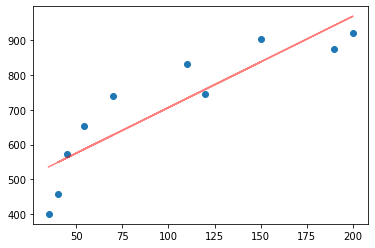

In [211]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, b0 + b1 * x, color='red', alpha=0.5)

##### Посчитайте коэффициент детерминации.

In [212]:
b = coefs(xtx, m_x, y)
z = m_x.dot(b)
R2 = 1 - ((y - z)**2).sum() / sum_of_squares(y)
R2

0.7876386635293685

##### Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

In [213]:
n = len(y)
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [214]:
# Критическая область

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

In [215]:
# Статистика Фишера
F = (R2 / k1) / ((1 - R2) / k2)
F

29.67164085966449

Статистика попала в правую критическую область. Уравнение регрессии признается значимым.

##### Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [216]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [217]:
s_slope = standard_error_slope(x, y, z)
s_slope

0.4810827956851601

In [218]:
alpha = 0.05
n = x.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.306004135033371, 2.3060041350333704)

In [219]:
(b1 + t1 * s_slope, b1 + t2 * s_slope)

(1.5111599662593713, 3.7299177985461585)

#### Доверительный интервал для параметра  b1
(1.5111599662593713, 3.7299177985461585)

In [220]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [221]:
s_intercept = standard_error_intercept(x, y, z)
s_intercept

56.46649755068154

In [222]:
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)

(313.96538048163626, 574.3893341670829)

#### Доверительный интервал для параметра  b0
(313.96538048163626, 574.3893341670829)

In [223]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              76.10
Date:                Fri, 27 Aug 2021   Prob (F-statistic):                    1.10e-05
Time:                        17:19:09   Log-Likelihood:                         -68.901
No. Observations:                  10   AIC:                                      139.8
Df Residuals:                       9   BIC:                                      140.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### Посчитать среднюю ошибку аппроксимации

In [224]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [225]:
mean_approximation_error(y, z)

0.11469251843561712

Вывод: теоретические значения не совсем совпадают с теми, которые выдает модель линейной регрессии.